In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint
# regressions
from scipy.stats import linregress

# Import API key
from api_keys_jkeme import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# linear modelling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# # Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

# Perform API Calls

In [3]:
cities[10:15]

NameError: name 'cities' is not defined

In [14]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [24]:
# Build query URL and request your results in Celsius
city = "atuona"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
print(weather_response.status_code)
weather_json = weather_response.json()

200


In [25]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -9.8, 'lon': -139.0333},
 'dt': 1650424415,
 'id': 4020109,
 'main': {'feels_like': 79.45,
          'grnd_level': 1006,
          'humidity': 71,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 79.45,
          'temp_max': 79.45,
          'temp_min': 79.45},
 'name': 'Atuona',
 'sys': {'country': 'PF', 'sunrise': 1650381568, 'sunset': 1650424232},
 'timezone': -34200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 93, 'gust': 18.37, 'speed': 17.2}}


In [ ]:
## Pull the Data required in the assignment readme

In [19]:
# To determine the weather_json data type
type(weather_json)

dict

In [22]:
# To pull the keys in the API call
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [26]:
# Create the list to store our data
cloudiness = weather_json["clouds"]["all"]
lat = weather_json["coord"]["lat"]
lng = weather_json["coord"]["lon"]
date_dt = weather_json["dt"]
humidity = weather_json["main"]['humidity']
pressure = weather_json["main"]['pressure']
temp = weather_json["main"]['temp_max']
city_name = weather_json["name"]
country = weather_json["sys"]["country"]
wind = weather_json["wind"]["speed"]

In [44]:
# Create loop to run through "cities"
lats = []
lngs = []
countries = []
clouds = []
dates = []
names = []
winds = []
temps = []
pressures = []
humids = []

for city in cities[0:622]:
    
    # Make request of the City
    print(city)
    
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    print(weather_response.status_code)
    print()
    
    # Try catch for errors
    try:
        # get data
        weather_json = weather_response.json()

        # parse the data
        cloudiness = weather_json["clouds"]["all"]
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        date_dt = weather_json["dt"]
        humidity = weather_json["main"]['humidity']
        pressure = weather_json["main"]['pressure']
        temp = weather_json["main"]['temp_max']
        city_name = weather_json["name"]
        country = weather_json["sys"]["country"]
        wind = weather_json["wind"]["speed"]

        # Add to lists
        lats.append(lat)
        lngs.append(lng)
        countries.append(country)
        clouds.append(cloudiness)
        dates.append(date_dt)
        names.append(city_name)
        winds.append(wind)
        temps.append(temp)
        pressures.append(pressure)
        humids.append(humidity)
            
    except Exception as e:
        print(e)
        
        # Add NULL Values to lists
        lats.append(np.nan)
        lngs.append(np.nan)
        countries.append(None)
        clouds.append(np.nan)
        dates.append(np.nan)
        names.append(city)
        winds.append(np.nan)
        temps.append(np.nan)
        pressures.append(np.nan)
        humids.append(np.nan)
        
    time.sleep(1)

marienburg
200

ancud
200

kavieng
200

rikitea
200

meulaboh
200

jamestown
200

kamenskoye
404

'clouds'
mar del plata
200

vaini
200

urumqi
200

punta arenas
200

kita
200

bredasdorp
200

atuona
200

port alfred
200

tammisaari
200

sao filipe
200

carnarvon
200

chuy
200

utiroa
404

'clouds'
kodiak
200

nikolskoye
200

mataura
200

east london
200

hermanus
200

vao
200

vysokogornyy
200

zubtsov
200

attawapiskat
404

'clouds'
yuancheng
200

busselton
200

yellowknife
200

lancaster
200

yithion
404

'clouds'
pochutla
200

fortuna
200

santo domingo
200

hakvik
404

'clouds'
khilok
200

kargasok
200

bafoulabe
200

naze
200

cape town
200

arraial do cabo
200

provideniya
200

thompson
200

whitehorse
200

albany
200

samusu
404

'clouds'
gat
200

hobart
200

vestmannaeyjar
200

norman wells
200

hasaki
200

illoqqortoormiut
404

'clouds'
saint anthony
200

ushuaia
200

butaritari
200

saint-augustin
200

tasiilaq
200

saint-philippe
200

sorong
200

pevek
200

nouadhibou
200



200

edson
200

divnomorskoye
200

urucara
200

ambovombe
200

kazaki
200

iranshahr
200

paamiut
200

udgir
200

tres arroyos
200

hamilton
200

emerald
200

eenhana
200

ngukurr
404

'clouds'
sao sepe
200

port augusta
200

malumfashi
200

chimbarongo
200

bonavista
200

neuquen
200

bambous virieux
200

bayir
200

tadine
200

pacific grove
200

burnie
200

kandava
200

artyk
404

'clouds'
miranda
200

kahului
200

champasak
200

sibolga
200

college
200

raudeberg
200

olutanga
200

whitianga
200

mosquera
200

sibu
200

manzil jamil
404

'clouds'
solnechnyy
200

hoganas
200

kem
200

stornoway
200

salalah
200

puerto colombia
200

launceston
200

solano
200

christchurch
200

aktau
200

tabatinga
200

mahaicony
404

'clouds'
behshahr
200

calabozo
200

alekseyevsk
200

nanfeng
200

kamenka
200

agirish
200

mogok
200

armacao dos buzios
404

'clouds'
loiza
200

luocheng
200

ewo
200

verkhnyaya inta
200

maarianhamina
200

orje
200

kulhudhuffushi
200

fairlie
200

rocha
200

roal

In [45]:
# Create a dataframe to store our data and for future analyses purposes
cities_df = pd.DataFrame()

cities_df["City"] = names
cities_df["Country"] = countries
cities_df["Latitude"] = lats
cities_df["Longitude"] = lngs
cities_df["Date"] = dates
cities_df["Wind_Speed"] = winds
cities_df["Pressure"] = pressures
cities_df["Humidity"] = humids
cities_df["Temperature"] = temps
cities_df["Cloudiness"] = clouds

cities_df.head(10)

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Malbork,PL,54.0359,19.0266,1.650427e+09,9.35,1014.0,95.0,47.12,100.0
1,Ancud,CL,-41.8697,-73.8203,1.650427e+09,3.71,1019.0,84.0,47.23,7.0
2,Kavieng,PG,-2.5744,150.7967,1.650427e+09,13.76,1007.0,65.0,85.50,76.0
3,Rikitea,PF,-23.1203,-134.9692,1.650427e+09,14.43,1019.0,74.0,78.13,15.0
4,Meulaboh,ID,4.1363,96.1285,1.650427e+09,3.38,1011.0,68.0,83.82,96.0
5,Jamestown,US,42.0970,-79.2353,1.650427e+09,7.00,1020.0,63.0,36.72,85.0
6,kamenskoye,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Mar del Plata,AR,-38.0023,-57.5575,1.650427e+09,3.44,1017.0,96.0,60.87,100.0
8,Vaini,TO,-21.2000,-175.2000,1.650427e+09,4.61,1013.0,94.0,75.36,75.0
9,Ürümqi,CN,43.8010,87.6005,1.650427e+09,4.47,1014.0,31.0,59.95,86.0


In [2]:
# Retrieve cities_df info
cities_df.info()

NameError: name 'cities_df' is not defined

In [47]:
# Save Data to a CSV file.
cities_df.to_csv("cities_df.csv", index=False)

# Part 2 of the HW

In [4]:
# Load crime data set into pandas
cities_df = pd.read_csv("../WeatherPy/cities_df.csv")
cities_df.head()

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Malbork,PL,54.0359,19.0266,1.650427e+09,9.35,1014.0,95.0,47.12,100.0
1,Ancud,CL,-41.8697,-73.8203,1.650427e+09,3.71,1019.0,84.0,47.23,7.0
2,Kavieng,PG,-2.5744,150.7967,1.650427e+09,13.76,1007.0,65.0,85.50,76.0
3,Rikitea,PF,-23.1203,-134.9692,1.650427e+09,14.43,1019.0,74.0,78.13,15.0
4,Meulaboh,ID,4.1363,96.1285,1.650427e+09,3.38,1011.0,68.0,83.82,96.0


In [5]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         622 non-null    object 
 1   Country      563 non-null    object 
 2   Latitude     566 non-null    float64
 3   Longitude    566 non-null    float64
 4   Date         566 non-null    float64
 5   Wind_Speed   566 non-null    float64
 6   Pressure     566 non-null    float64
 7   Humidity     566 non-null    float64
 8   Temperature  566 non-null    float64
 9   Cloudiness   566 non-null    float64
dtypes: float64(8), object(2)
memory usage: 48.7+ KB


## Inspect the data and remove the cities where humidity > 100%

In [6]:
## Find the cities with humidity > 100%. 

In [7]:
# Use the "cities_df.describe()" to find the range of our dataset.

# There is a maximum Humidity value of 100.There are no cities to remove from the dataset.

cities_df.describe()

,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
count,566.000000,566.000000,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000
mean,21.314068,16.454789,1.650428e+09,8.142544,1012.787986,70.072438,59.265018,56.266784
std,33.109158,91.983786,2.598616e+02,5.874588,14.713221,22.049021,21.252757,39.455424
min,-54.800000,-175.200000,1.650427e+09,0.000000,706.000000,1.000000,-14.220000,0.000000
25%,-3.748425,-66.849175,1.650428e+09,3.797500,1009.250000,60.000000,43.472500,14.250000
50%,25.909500,20.087500,1.650428e+09,6.770000,1013.000000,76.000000,63.905000,67.500000
75%,49.650100,102.276150,1.650428e+09,11.180000,1018.000000,87.000000,76.252500,99.000000
max,78.218600,178.416700,1.650428e+09,44.720000,1038.000000,100.000000,96.460000,100.000000


In [9]:
# Find the maximum Humidity value of 100.
# In this second line, I removed all rows with NULL values.

mask1 = cities_df.Humidity <= 100
cities_df_sub = cities_df.loc[mask1].dropna().reset_index(drop=True)

In [10]:
cities_df_sub.describe()

,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
count,563.000000,563.000000,5.630000e+02,563.000000,563.000000,563.000000,563.000000,563.000000
mean,21.538726,16.462322,1.650428e+09,8.122078,1012.792185,70.245115,59.195933,56.326821
std,33.052953,92.228885,2.599346e+02,5.880081,14.750878,21.966254,21.279713,39.443321
min,-54.800000,-175.200000,1.650427e+09,0.000000,706.000000,1.000000,-14.220000,0.000000
25%,-3.393100,-67.026850,1.650428e+09,3.770000,1009.000000,60.000000,43.430000,14.500000
50%,26.326000,20.226300,1.650428e+09,6.620000,1013.000000,76.000000,63.810000,68.000000
75%,49.823950,102.389850,1.650428e+09,11.150000,1018.000000,87.000000,76.160000,99.000000
max,78.218600,178.416700,1.650428e+09,44.720000,1038.000000,100.000000,96.460000,100.000000


In [11]:
# In this dataframe, this confirms all rows with NULL values are removed.

cities_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         563 non-null    object 
 1   Country      563 non-null    object 
 2   Latitude     563 non-null    float64
 3   Longitude    563 non-null    float64
 4   Date         563 non-null    float64
 5   Wind_Speed   563 non-null    float64
 6   Pressure     563 non-null    float64
 7   Humidity     563 non-null    float64
 8   Temperature  563 non-null    float64
 9   Cloudiness   563 non-null    float64
dtypes: float64(8), object(2)
memory usage: 44.1+ KB


#  Plotting the Data

In [15]:
cities_df.columns

Index(['City', 'Country', 'Latitude', 'Longitude', 'Date', 'Wind_Speed',
       'Pressure', 'Humidity', 'Temperature', 'Cloudiness'],
      dtype='object')

# Latitude vs. Temperature

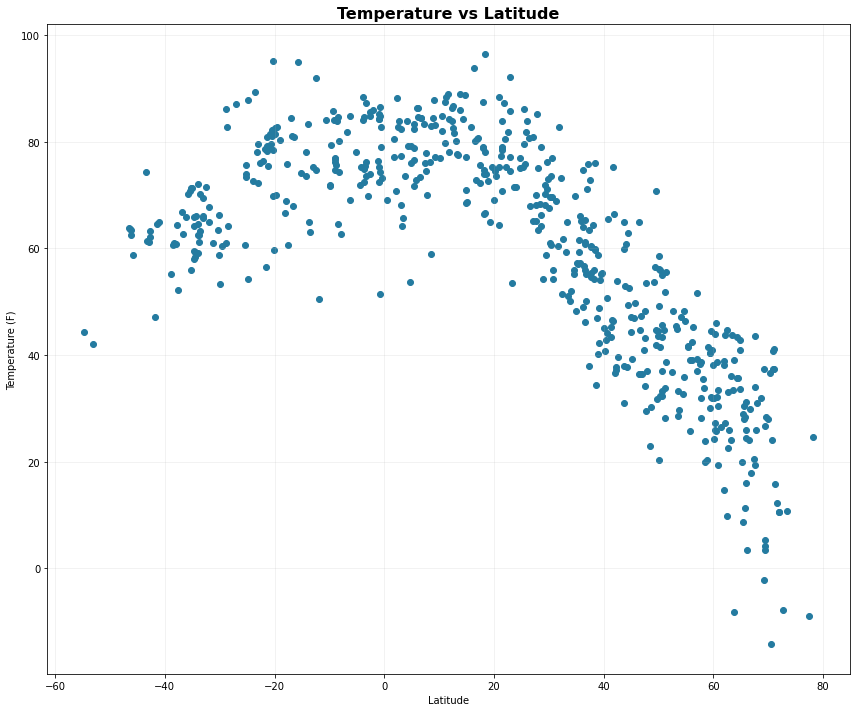

In [13]:
# Latitude vs. Tempertature
plt.figure(figsize=(12,10))

plt.scatter(cities_df.Latitude, cities_df.Temperature, color="#247ba0")

plt.title("Temperature vs Latitude", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.grid(axis="both", alpha=0.2)

plt.tight_layout()
plt.savefig("Lat_V_Temp.png")
plt.show()

As we move away from the equator, measured at 0 Degrees Latitude, the temperature in the city decreases. 

# Latitude vs. Humidity 

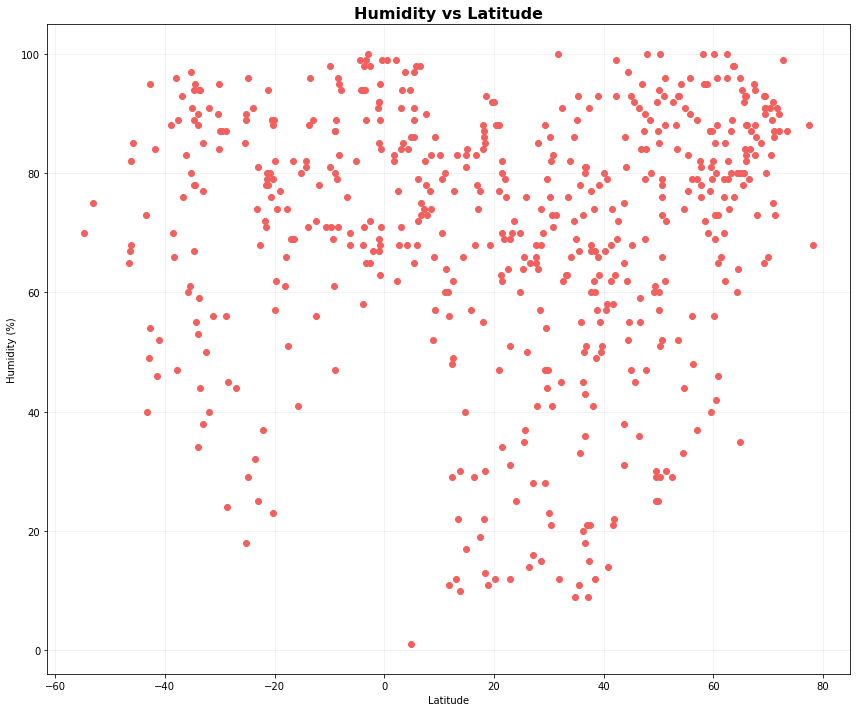

In [19]:
# Latitude vs. Tempertature
plt.figure(figsize=(12,10))

plt.scatter(cities_df.Latitude, cities_df.Humidity, color="#f25f5c")

plt.title("Humidity vs Latitude", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(axis="both", alpha=0.2)

plt.tight_layout()
plt.savefig("Lat_V_Humidity.png")
plt.show()

There is no clear trend in the scatter plot. I do see random clusters in the scatterplot. 

# Latitude vs. Cloudiness

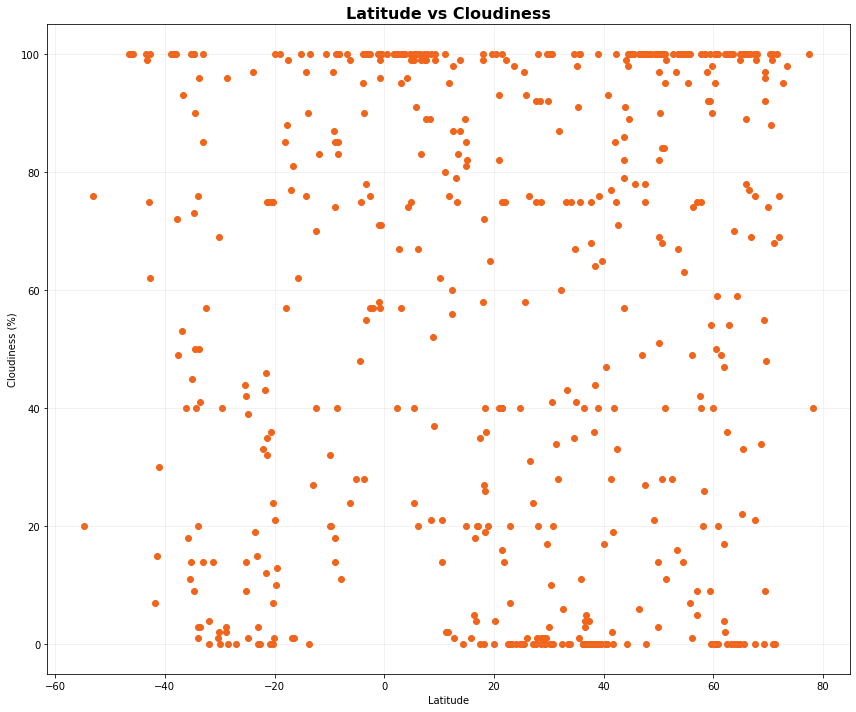

In [44]:
# Latitude vs. Tempertature
plt.figure(figsize=(12,10))

plt.scatter(cities_df.Latitude, cities_df.Cloudiness, color="#F26419")

plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(axis="both", alpha=0.2)

plt.tight_layout()
plt.savefig("Lat_V_Cloudiness.png")
plt.show()

I do not see an observable trend. However, there is no cloudiness at the equator and more cloudiness in the Northern Hemisphere.

# Latitude vs. Windspeed 

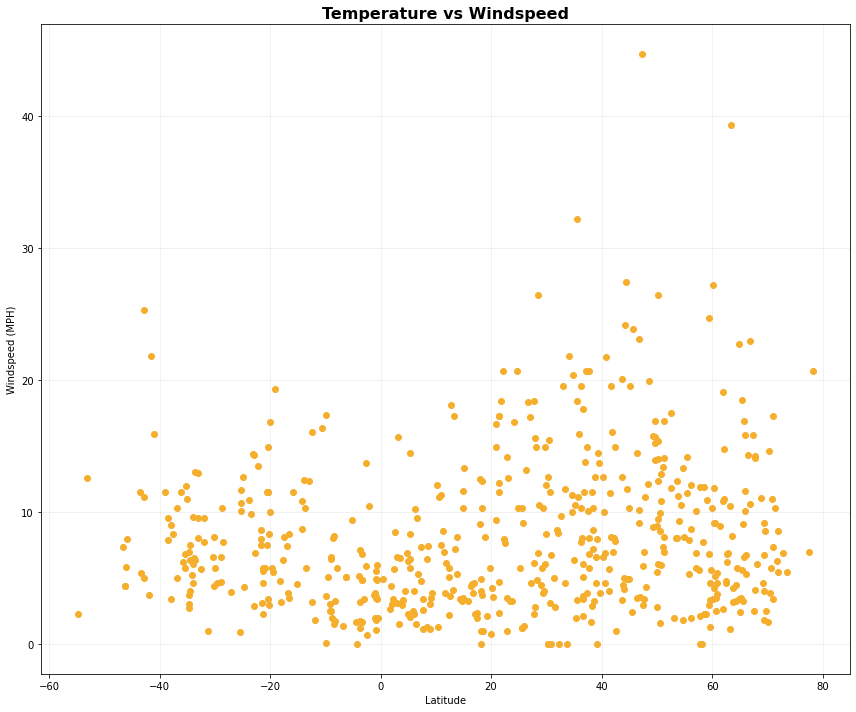

In [43]:
# Latitude vs. Tempertature
plt.figure(figsize=(12,10))

plt.scatter(cities_df.Latitude, cities_df.Wind_Speed, color="#F6AE2D")

plt.title("Temperature vs Windspeed", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Windspeed (MPH)")

plt.grid(axis="both", alpha=0.2)

plt.tight_layout()
plt.savefig("Lat_V_WindSpd.png")
plt.show()

There is a cluster at higher Latitude locations, this is shown with the cluster of data points with windspeeds greater than
0 degrees.

# Linear Regression 

In [91]:
 # Linear Modelling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [92]:
# Create a Northern Hempisphere Dataframe and a Southern Hemisphere Dataframe, doing this will make the process of
# running my linear regressions more efficient.

cities_df_north = cities_df_sub.loc[cities_df_sub.Latitude >= 0]
cities_df_south = cities_df_sub.loc[cities_df_sub.Latitude < 0]

In [93]:
cities_df_north.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 562
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         401 non-null    object 
 1   Country      401 non-null    object 
 2   Latitude     401 non-null    float64
 3   Longitude    401 non-null    float64
 4   Date         401 non-null    float64
 5   Wind_Speed   401 non-null    float64
 6   Pressure     401 non-null    float64
 7   Humidity     401 non-null    float64
 8   Temperature  401 non-null    float64
 9   Cloudiness   401 non-null    float64
dtypes: float64(8), object(2)
memory usage: 34.5+ KB


In [94]:
cities_df_south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 1 to 561
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         162 non-null    object 
 1   Country      162 non-null    object 
 2   Latitude     162 non-null    float64
 3   Longitude    162 non-null    float64
 4   Date         162 non-null    float64
 5   Wind_Speed   162 non-null    float64
 6   Pressure     162 non-null    float64
 7   Humidity     162 non-null    float64
 8   Temperature  162 non-null    float64
 9   Cloudiness   162 non-null    float64
dtypes: float64(8), object(2)
memory usage: 13.9+ KB


# Northern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: 0.7792565461451779


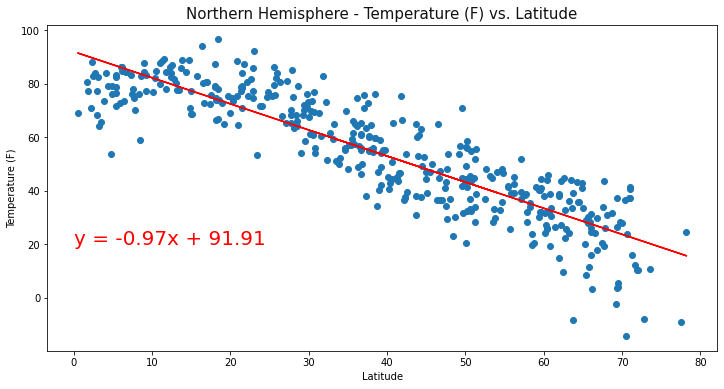

In [138]:
plt.figure(figsize=(12,6))
x_values = cities_df_north['Latitude']
y_values = cities_df_north['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(0,20),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

print(f"The r-squared is: {rvalue**2}")

plt.savefig("FIG 1. Northern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()

The trend shows that temperature decreases the further away we are from the equator. The R-squared shows strong predictive value, I would add Temperature in a City Temperature model.

#  Southern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: 0.3777801375542507


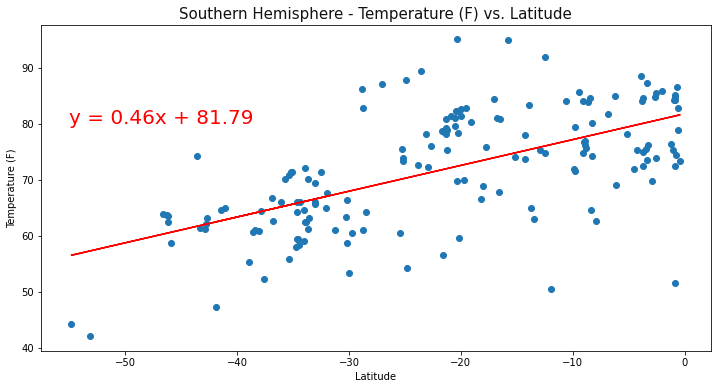

In [136]:
plt.figure(figsize=(12,6))
x_values = cities_df_south['Latitude']
y_values = cities_df_south['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(-55,80),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 2. Southern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()

As we move closer to the equator from the Southern Hemisphere, temperature increases. The R-squared shows moderaate predictive value, I would add Temperature in a City Temperature model.

# Northern Hemisphere - Humidity (%) vs. Latitude 

The r-squared is: 0.04904640643666968


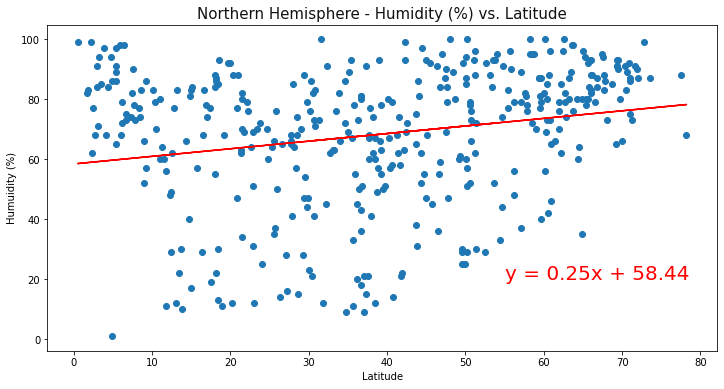

In [132]:
plt.figure(figsize=(12,6))
x_values = cities_df_north['Latitude']
y_values = cities_df_north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(55,20),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humuidity (%)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 3. Northern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

The Northern Hemisphere is more humid than the Southern Hemisphere. However, the Northern Hemisphere cities are above 60% humidity. The R-squared does not show strong predictive value.

#  Southern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: 0.04723020741413363


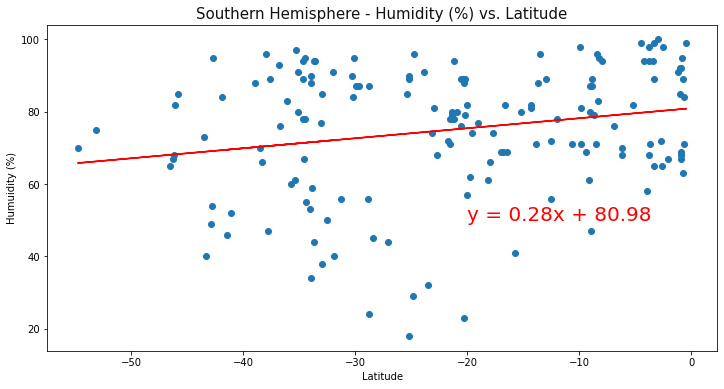

In [125]:
plt.figure(figsize=(12,6))
x_values = cities_df_south['Latitude']
y_values = cities_df_south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(-20,50),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humuidity (%)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 4. Southern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

As we move closer to the equator, Humidity levels increase. The R-squared does not show strong predictive value.

#  Northern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.0014484908381009929


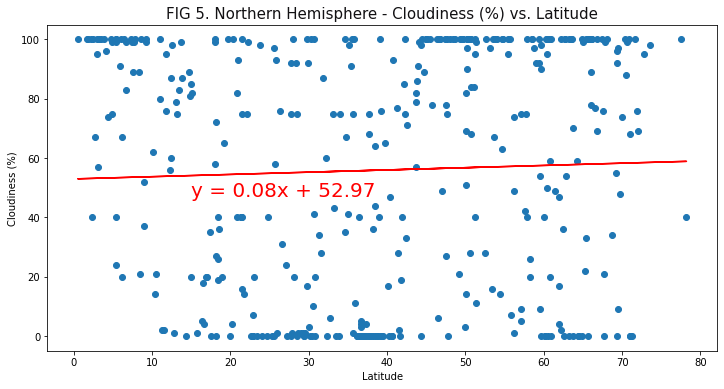

In [119]:
plt.figure(figsize=(12,6))
x_values = cities_df_north['Latitude']
y_values = cities_df_north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('FIG 5. Northern Hemisphere - Cloudiness (%) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(15,47),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 5. Northern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()

#  Southern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.03382881262848685


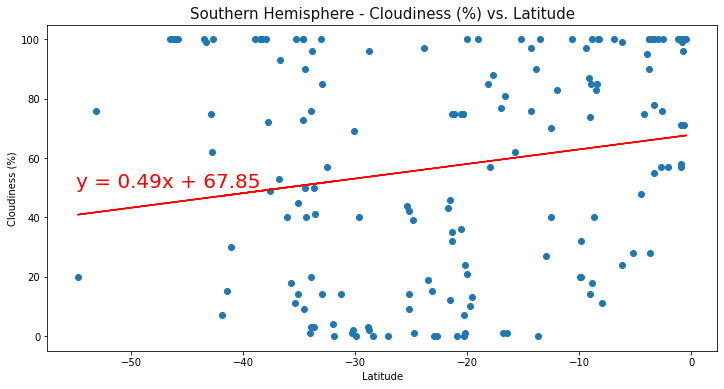

In [142]:
plt.figure(figsize=(12,6))
x_values = cities_df_south['Latitude']
y_values = cities_df_south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(-55,50),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 6. Southern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()

#  Northern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: 0.022558119916134222


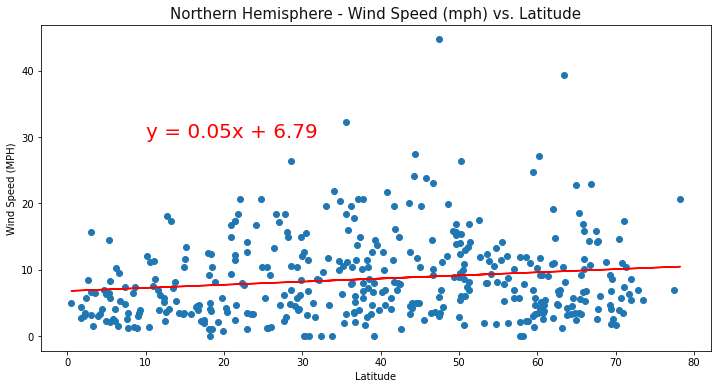

In [145]:
plt.figure(figsize=(12,6))
x_values = cities_df_north['Latitude']
y_values = cities_df_north['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(10,30),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 7. Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()

#  Southern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: 0.08860769447865866


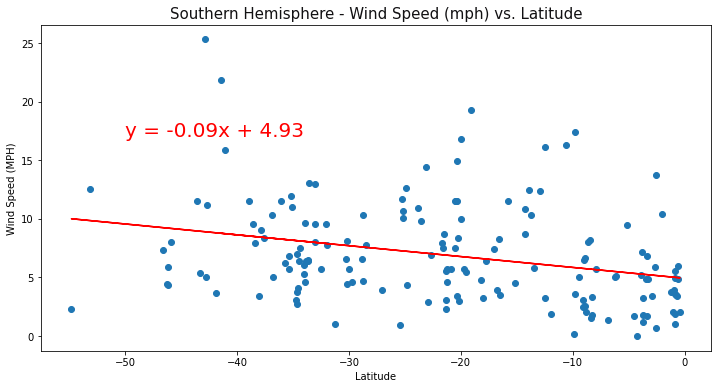

In [149]:
plt.figure(figsize=(12,6))
x_values = cities_df_south['Latitude']
y_values = cities_df_south['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(-50,17),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 8. Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()

In [45]:
# Correlation Matrix
cities_df.corr()

corrs = cities_df.corr()

corrs

,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
Latitude,1.000000,-0.093934,0.019108,0.147064,0.013390,0.017836,-0.683397,0.026429
Longitude,-0.093934,1.000000,0.115099,0.036076,-0.096412,-0.203184,0.116112,0.105459
Date,0.019108,0.115099,1.000000,-0.090618,0.014065,0.070146,0.043785,-0.021553
Wind_Speed,0.147064,0.036076,-0.090618,1.000000,-0.027034,-0.174650,-0.078138,0.025624
Pressure,0.013390,-0.096412,0.014065,-0.027034,1.000000,0.077917,-0.045709,-0.131528
Humidity,0.017836,-0.203184,0.070146,-0.174650,0.077917,1.000000,-0.303296,0.283649
Temperature,-0.683397,0.116112,0.043785,-0.078138,-0.045709,-0.303296,1.000000,-0.094522
Cloudiness,0.026429,0.105459,-0.021553,0.025624,-0.131528,0.283649,-0.094522,1.000000


[]

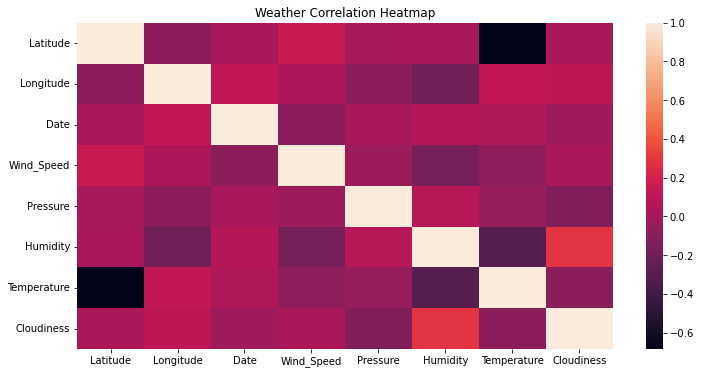

In [150]:
# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corrs)

plt.title('Weather Correlation Heatmap')
plt.savefig("FIG 9. Weather Correlation Heatmap.png")
plt.plot()